# Text Classification

In [1]:
#import spacy and load the language model downloaded
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
#import pandas library
import pandas as pd

# About the data

In [6]:
#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df = pd.read_json("news_dataset.json")

In [5]:
#print the shape of data
df.shape

(7500, 2)

In [7]:
#print the top5 rows
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [8]:
#check the distribution of labels 
df.category.value_counts()

category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [9]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['category'].map({'CRIME': 0, 'SPORTS': 1, 'BUSINESS': 2})

In [10]:
#check the results with top 5 rows
df.head()

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


# Preprocess text

In [11]:
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [12]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]
df['preprocessed_text'] = df['text'].apply(lambda text: preprocess(text))

In [13]:
#print the top 5 rows
df.head()

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


# Get the spacy embeddings for each preprocessed text

In [14]:
#create a new column "vector" that store the vector representation of each pre-processed text
df['vector'] = df['preprocessed_text'].apply(lambda text: nlp(text).vector) 

In [15]:
#print the top 5 rows
df.head()

,text,category,label_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


# Train-Test splitting

In [16]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [21]:
X_train

array([array([-0.75421077,  0.6757007 , -0.8103016 , -0.36451474,  1.943962  ,
               0.89710534,  1.6667575 ,  2.2389388 , -1.4035333 , -0.04789238,
               2.1404338 ,  1.0904554 , -1.4379984 , -0.96389085, -0.09045536,
               0.59112   , -0.31627148, -1.4955684 , -0.7992073 ,  0.4178073 ,
               0.8412622 ,  1.2190624 ,  1.0316141 , -1.2051774 ,  1.0414815 ,
              -0.7621094 , -0.644522  ,  0.07541333,  0.48121196, -0.5205901 ,
               1.4094892 ,  0.8018907 ,  0.36769167,  0.65687066, -0.8550199 ,
              -1.3493154 , -1.7030555 ,  0.34671888, -0.00570598,  0.48409203,
              -0.27079943,  0.05977068,  1.2400585 , -0.28377095, -0.58447367,
               0.6155707 ,  0.08372927, -1.3828926 , -0.47318897,  1.3583547 ,
               0.11905539, -0.22138388,  1.8554968 , -0.50412124, -0.0278773 ,
              -1.1545568 ,  0.60336   ,  0.03980036,  0.11591005,  0.16612536,
               1.8213847 ,  0.8264089 , -0.8314514 ,

In [17]:
import numpy as np

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (6000,)
Shape of X_test before reshaping:  (1500,)
Shape of X_train after reshaping:  (6000, 300)
Shape of X_test after reshaping:  (1500, 300)


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

#5. Accuracy of model
dt_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       500
           1       0.71      0.72      0.72       500
           2       0.74      0.71      0.73       500

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



# MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)

#4. print the classfication report
print(classification_report(y_test, y_pred))

#5. Accuracy of model
mnb_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.85      0.77      0.81       500
           2       0.80      0.83      0.82       500

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



# KNN

In [32]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

#5. Accuracy of model
knn_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       500
           1       0.92      0.81      0.86       500
           2       0.88      0.87      0.88       500

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.87      1500
weighted avg       0.88      0.88      0.87      1500



# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

#1. creating a Random Forest model object
clf = RandomForestClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

#5. Accuracy of model
rf_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       500
           1       0.89      0.83      0.86       500
           2       0.86      0.88      0.87       500

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

#5. Accuracy of model
gb_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       500
           1       0.91      0.85      0.88       500
           2       0.88      0.92      0.90       500

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



# Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

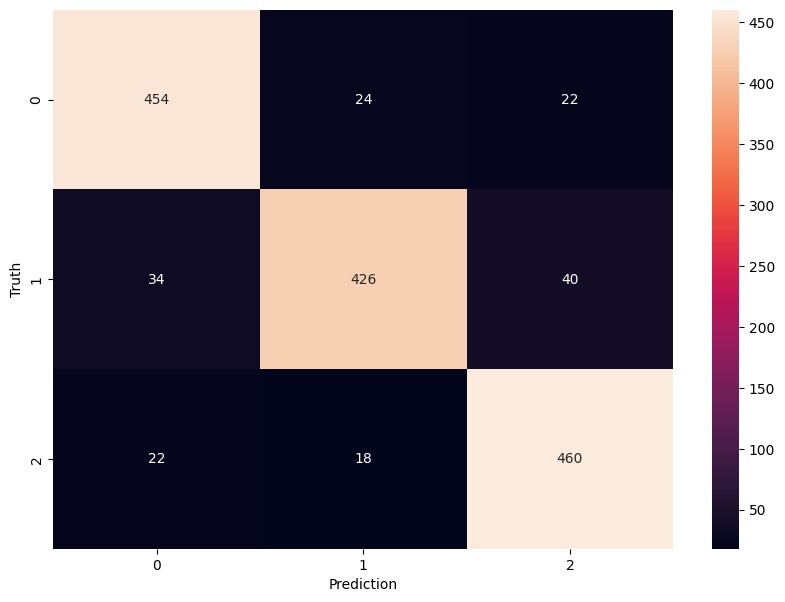

In [35]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Visual Comparison

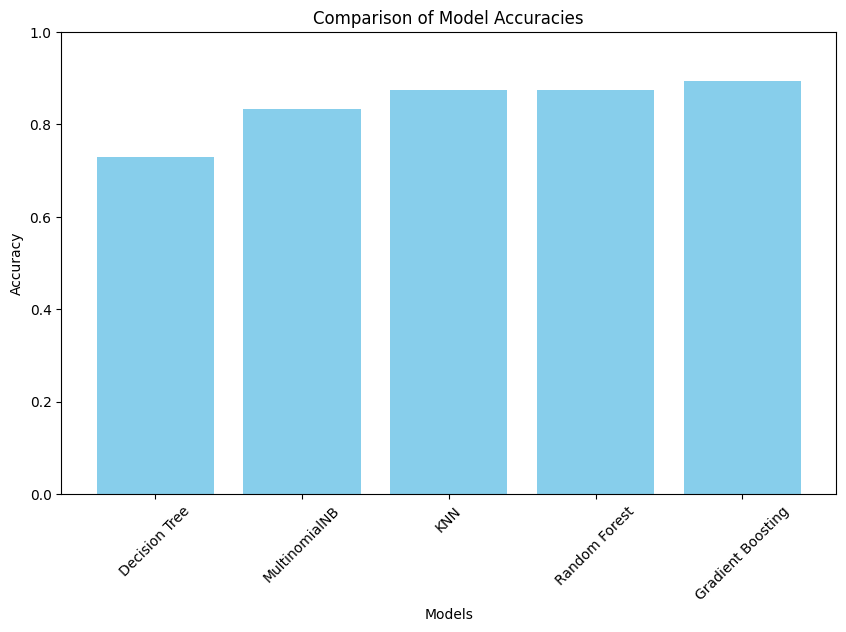

In [36]:
import matplotlib.pyplot as plt

# Assuming you have a dictionary with model names as keys and their accuracies as values
accuracies = {
    "Decision Tree": dt_accuracy,
    "MultinomialNB": mnb_accuracy,
    "KNN": knn_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy
}

# Extracting model names and their corresponding accuracies
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.show()